In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pickle as p
import warnings
warnings.filterwarnings('ignore')

In [3]:
MARUTI = p.load(open("/content/drive/MyDrive/Colab Notebooks/Datasets/Indian/Final/MARUTI_combined__v3.p",'rb'))

### Data Preprocessing

### Model

In [4]:
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 13

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)
# for later versions: 
# tf.compat.v1.set_random_seed(seed_value)

# 5. Configure a new global `tensorflow` session
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
K.set_session(sess)

In [5]:
def Model():
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.LSTM(20, input_shape = (5, 27), activation = tf.nn.leaky_relu, return_sequences = True, \
                                                           kernel_initializer='random_normal',
                                                           bias_initializer='zeros'),
                                      tf.keras.layers.LSTM(10, activation = tf.nn.leaky_relu),
                                      # tf.keras.layers.Dense(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
                                      # tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(30, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(15, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(5, activation = tf.nn.leaky_relu)
                                      ])
  return model

In [6]:
model = Model()

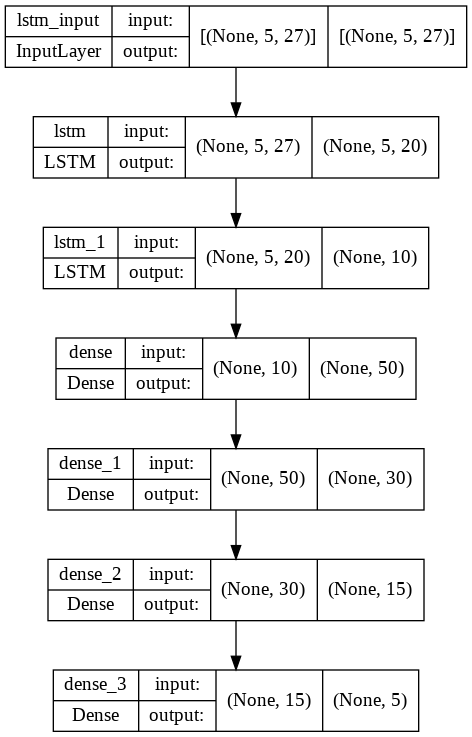

In [7]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 20)             3840      
                                                                 
 lstm_1 (LSTM)               (None, 10)                1240      
                                                                 
 dense (Dense)               (None, 50)                550       
                                                                 
 dense_1 (Dense)             (None, 30)                1530      
                                                                 
 dense_2 (Dense)             (None, 15)                465       
                                                                 
 dense_3 (Dense)             (None, 5)                 80        
                                                                 
Total params: 7,705
Trainable params: 7,705
Non-trainabl

### Custom Learning Rate

In [9]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

In [10]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=30,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

#MARUTI

In [11]:
MARUTI.tail()

,stock_open,stock_high,stock_low,stock_close,stock_adjclose_target,stock_volume,SMA,EMA,nifty50_price,nifty50_open,nifty50_high,nifty50_low,nifty50_volume,nifty50_Chg%,niftyauto_price,niftyauto_open,niftyauto_high,niftyauto_low,niftyauto_volume,niftyauto_Chg%,Sales,Expenses,Material Cost,Employee Cost,Operating Profit,OPM,Other Income,Interest,Depreciation,Profit before tax,Tax,Net Profit,EPS in Rs,"Agriculture, Forestry and Fishing",Mining & Quarrying,Manufacturing,"Electricity, Gas, Water Supply & Other Utility",Construction,"Trade, Hotels, Transport, Communication and Services Related to Broadcasting","Financial, Real Estate and Professional Services","Public Administration, Defence and Other Services",Total Gross Value Added at Basic Price,CPI Index,CPI Index Previous Month,CPI Index Previous Quarter,CPI Index Previous Year,by_Closing_Price,by_Open,by_High,by_Low,by_Change%,Per_chg_qgdp,CPI_monthly_oecd,cli_monthly,ShPrice_monthly
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-11-24,7865.5,7897.950195,7636.600098,7669.450195,7669.450195,571078.0,7775.4899,7798.5477,17415.05,17550.05,17600.60,17354.0,298050000.0,-0.50,11308.85,NaN,11532.65,11266.95,44650000.0,-1.28,20551.0,19694.0,76.0,5.0,857.0,4.0,532.0,23.0,757.0,610.0,20.0,487.0,16.12,407640.6354,70021.52469,586774.7019,86329.84504,240527.8671,579112.5787,845467.9951,472860.9456,3288736.094,163.2,162.9,159.83,156.4,6.367,6.390,6.390,6.363,0.05,12.6866,4.837365,100.217,217.3347
2021-11-25,7640.0,7719.399902,7435.000000,7572.500000,7572.500000,1007618.0,7781.6249,7756.9845,17536.25,17417.30,17564.35,17351.7,255950000.0,0.70,11247.75,NaN,11366.20,11193.00,36100000.0,-0.54,20551.0,19694.0,76.0,5.0,857.0,4.0,532.0,23.0,757.0,610.0,20.0,487.0,16.12,407640.6354,70021.52469,586774.7019,86329.84504,240527.8671,579112.5787,845467.9951,472860.9456,3288736.094,163.2,162.9,159.83,156.4,6.367,6.376,6.376,6.366,0.00,12.6866,4.837365,100.217,217.3347
2021-11-26,7520.0,7520.000000,7130.000000,7170.500000,7170.500000,1154876.0,7753.4099,7650.4237,17026.45,17338.75,17355.40,16985.7,356330000.0,-2.91,10759.60,NaN,11159.60,10721.35,94290000.0,-4.34,20551.0,19694.0,76.0,5.0,857.0,4.0,532.0,23.0,757.0,610.0,20.0,487.0,16.12,407640.6354,70021.52469,586774.7019,86329.84504,240527.8671,579112.5787,845467.9951,472860.9456,3288736.094,163.2,162.9,159.83,156.4,6.330,6.338,6.338,6.319,-0.58,12.6866,4.837365,100.217,217.3347
2021-11-29,7166.0,7210.000000,6990.700195,7149.500000,7149.500000,733010.0,7720.3250,7558.8376,17053.95,17055.80,17160.70,16782.4,348890000.0,0.16,10704.15,NaN,10807.65,10448.15,79310000.0,-0.52,20551.0,19694.0,76.0,5.0,857.0,4.0,532.0,23.0,757.0,610.0,20.0,487.0,16.12,407640.6354,70021.52469,586774.7019,86329.84504,240527.8671,579112.5787,845467.9951,472860.9456,3288736.094,163.2,162.9,159.83,156.4,6.335,6.375,6.375,6.329,0.08,12.6866,4.837365,100.217,217.3347
2021-11-30,7149.5,7250.000000,7015.549805,7067.799805,7067.799805,1287938.0,7678.8350,7472.8944,16983.20,17051.15,17324.65,16931.4,498000000.0,-0.41,10603.55,NaN,10868.75,10554.25,74160000.0,-0.94,20551.0,19694.0,76.0,5.0,857.0,4.0,532.0,23.0,757.0,610.0,20.0,487.0,16.12,407640.6354,70021.52469,586774.7019,86329.84504,240527.8671,579112.5787,845467.9951,472860.9456,3288736.094,163.2,162.9,159.83,156.4,6.326,6.331,6.342,6.307,-0.14,12.6866,4.837365,100.217,217.3347


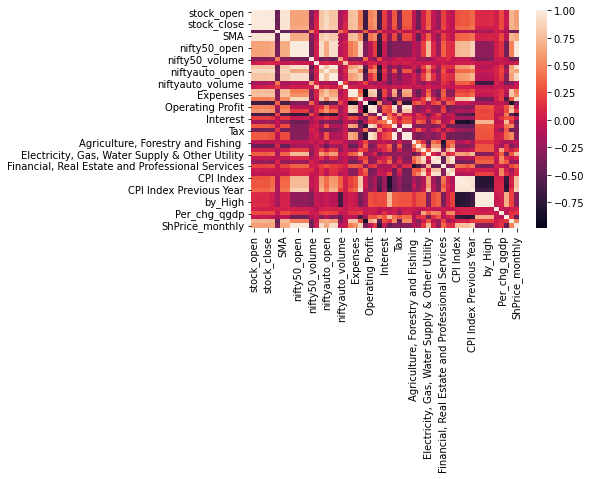

In [12]:
sns.heatmap(MARUTI.corr())

In [13]:
MARUTI.corr()

,stock_open,stock_high,stock_low,stock_close,stock_adjclose_target,stock_volume,SMA,EMA,nifty50_price,nifty50_open,nifty50_high,nifty50_low,nifty50_volume,nifty50_Chg%,niftyauto_price,niftyauto_open,niftyauto_high,niftyauto_low,niftyauto_volume,niftyauto_Chg%,Sales,Expenses,Material Cost,Employee Cost,Operating Profit,OPM,Other Income,Interest,Depreciation,Profit before tax,Tax,Net Profit,EPS in Rs,"Agriculture, Forestry and Fishing",Mining & Quarrying,Manufacturing,"Electricity, Gas, Water Supply & Other Utility",Construction,"Trade, Hotels, Transport, Communication and Services Related to Broadcasting","Financial, Real Estate and Professional Services","Public Administration, Defence and Other Services",Total Gross Value Added at Basic Price,CPI Index,CPI Index Previous Month,CPI Index Previous Quarter,CPI Index Previous Year,by_Closing_Price,by_Open,by_High,by_Low,by_Change%,Per_chg_qgdp,CPI_monthly_oecd,cli_monthly,ShPrice_monthly
stock_open,1.000000,0.990747,0.993507,0.984013,0.980706,-0.462085,0.959489,0.972374,0.627792,0.630621,0.622708,0.634471,-0.323263,-0.011205,0.791896,0.893630,0.791392,0.798955,-0.175479,-0.042354,0.760297,0.786485,0.445356,-0.655865,0.478848,0.575993,-0.606967,0.197120,-0.180521,0.306043,-0.397524,0.311744,0.311936,-0.052120,-0.435475,0.040222,0.322462,-0.042750,-0.236429,0.204332,0.007367,-0.057573,0.274612,0.307218,0.301687,0.363294,0.106287,0.099407,0.094084,0.115982,0.031978,0.248912,-0.007960,0.720528,0.607244
stock_high,0.990747,1.000000,0.989914,0.994340,0.991586,-0.398173,0.957145,0.970777,0.629447,0.629685,0.624142,0.634125,-0.299355,0.029692,0.794632,0.899045,0.793246,0.797116,-0.147035,0.030360,0.755198,0.782147,0.449149,-0.644984,0.471122,0.563531,-0.610442,0.191949,-0.187302,0.297121,-0.394703,0.303073,0.303267,-0.053188,-0.441384,0.041622,0.328135,-0.041600,-0.233497,0.209342,0.017173,-0.052765,0.278212,0.311644,0.306400,0.368328,0.104576,0.096627,0.092608,0.113251,0.045868,0.257258,-0.018165,0.709828,0.608784
stock_low,0.993507,0.989914,1.000000,0.992691,0.988711,-0.476254,0.953746,0.967635,0.634088,0.634678,0.627175,0.640964,-0.342863,0.028440,0.798744,0.902862,0.794707,0.805110,-0.186391,0.019904,0.767884,0.793607,0.444667,-0.669959,0.487116,0.590473,-0.611128,0.201686,-0.173773,0.312795,-0.395457,0.317570,0.317759,-0.060838,-0.425446,0.042290,0.325916,-0.042462,-0.237217,0.207311,0.000004,-0.059687,0.275492,0.305556,0.298278,0.363242,0.108344,0.101314,0.095849,0.118607,0.034485,0.238930,0.002205,0.725718,0.610254
stock_close,0.984013,0.994340,0.992691,1.000000,0.996445,-0.425181,0.949265,0.964119,0.632357,0.630357,0.624942,0.636800,-0.319771,0.070923,0.797561,0.904437,0.792288,0.799095,-0.162728,0.082984,0.759617,0.785901,0.446365,-0.656469,0.477837,0.576054,-0.610025,0.196999,-0.179188,0.303746,-0.391214,0.308757,0.308947,-0.061338,-0.431505,0.041878,0.327213,-0.042666,-0.235177,0.209776,0.007739,-0.057234,0.276925,0.308093,0.300959,0.365616,0.106177,0.098654,0.093980,0.115855,0.037473,0.246015,-0.006738,0.714968,0.608174
stock_adjclose_target,0.980706,0.991586,0.988711,0.996445,1.000000,-0.414657,0.952663,0.967348,0.674521,0.672568,0.667713,0.678363,-0.304505,0.071205,0.820085,0.912528,0.815330,0.821003,-0.121676,0.085091,0.754672,0.788084,0.498760,-0.637341,0.439531,0.546280,-0.632583,0.169951,-0.245408,0.260217,-0.400105,0.266708,0.266888,-0.074708,-0.453884,0.028132,0.372263,-0.058642,-0.262233,0.246462,0.014009,-0.066031,0.352984,0.383591,0.374647,0.434992,0.035279,0.027884,0.022987,0.045062,0.041884,0.246141,-0.066889,0.697372,0.653294
stock_volume,-0.462085,-0.398173,-0.476254,-0.425181,-0.414657,1.000000,-0.464472,-0.467257,-0.373466,-0.373992,-0.367056,-0.379193,0.457740,0.061714,-0.430358,-0.360898,-0.421673,-0.446310,0.421364,0.179763,-0.299718,-0.318968,-0.252859,0.329274,-0.145675,-0.297592,0.220547,-0.075646,-0.030281,-0.073133,0.138661,-0.066930,-0.067003,-0.031407,0.074102,-0.113963,-0.166581,-0.065649,0.065368,-0.020762,-0.016090,-0.034441,-0.097810,-0.097660,-

In [14]:
MARUTI.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 717 entries, 2019-01-01 to 2021-11-30
Data columns (total 55 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   stock_open                                                                    717 non-null    float64
 1   stock_high                                                                    717 non-null    float64
 2   stock_low                                                                     717 non-null    float64
 3   stock_close                                                                   717 non-null    float64
 4   stock_adjclose_target                                                         717 non-null    float64
 5   stock_volume                                                                  717 non-null    float64
 6   SMA            

In [15]:
# Resetting index to get date as an attribute
MARUTI.reset_index(inplace=True)

In [16]:
# Defining training columns
trainCols = MARUTI.columns.tolist()
trainCols.remove('stock_adjclose_target')
trainCols.remove('Date')

In [17]:
trainCols = ['stock_open', 'EMA', 'SMA', 'Expenses', 'niftyauto_open',
       'cli_monthly', 'Employee Cost', 'nifty50_price',
       'ShPrice_monthly', 'Other Income',
       'OPM', 'Material Cost', 'Operating Profit', 'CPI Index Previous Year',
       'Mining & Quarrying', 'Electricity, Gas, Water Supply & Other Utility',
       'CPI Index Previous Month', 'Tax', 'CPI Index Previous Quarter',
       'CPI Index', 'EPS in Rs',
       'Net Profit', 'Profit before tax',
       'Financial, Real Estate and Professional Services',
       'Trade, Hotels, Transport, Communication and Services Related to Broadcasting',
       'Depreciation', 'Per_chg_qgdp']

In [18]:
len(trainCols)

27

In [19]:
# Change Dtype of date column
MARUTI["Date"] = pd.to_datetime(MARUTI["Date"])

###Split the Data into Training and Test set
    Training Period: 2019-01-01 - 2021-08-01

    Testing Period:  2021-08-01 - 2021-10-29

In [20]:
def Dataset(Data, train_cols, target_col, datecol,date):
  Train_Data = MARUTI[MARUTI[datecol] < pd.to_datetime(date)]
  # print(Train_Data.shape)
  Data_Train_X = []
  Data_Train_Y = []
  for i in range(0, Train_Data.shape[0], 5):
    # print(i)
    Data_Train_X.append(Train_Data.loc[i : i + 4,trainCols].to_numpy())
    Data_Train_Y.append(Train_Data.loc[i : i + 4,target_col].to_numpy())

  if len(Data_Train_X[-1]) < 5:
    Data_Train_X.pop(-1)
    Data_Train_Y.pop(-1)

  Data_Train_X = Data_Train_X[:-1]
  Data_Train_Y = Data_Train_Y[1:]
  Data_Train_X = np.array(Data_Train_X)
  Data_Train_Y = np.array(Data_Train_Y)
  # Data_Train_X = Data_Train_X.reshape((-1, 5, 1))
  Data_Train_Y = Data_Train_Y.reshape((-1, 5, 1))

  Test_Data = MARUTI[MARUTI[datecol] >= pd.to_datetime(date)]
  Test_Data.reset_index(inplace=True)
  Data_Test_X = []
  Data_Test_Y = []
  for i in range(0, Test_Data.shape[0], 5):
    # print(i)
    Data_Test_X.append(Test_Data.loc[i : i + 4,trainCols].to_numpy())
    Data_Test_Y.append(Test_Data.loc[i : i + 4,target_col].to_numpy())

  print(len(Data_Test_X[-1]))

  if len(Data_Test_X[-1]) < 5:
    Data_Test_X.pop(-1)
    Data_Test_Y.pop(-1)

  Data_Test_X = Data_Test_X[:-1]
  Data_Test_Y = Data_Test_Y[1:]
  Data_Test_X = np.array(Data_Test_X)
  Data_Test_Y = np.array(Data_Test_Y)
  # Data_Test_X = Data_Test_X.reshape((-1, 5, 54))
  Data_Test_Y = Data_Test_Y.reshape((-1, 5, 1))

  return Data_Train_X, Data_Train_Y, Data_Test_X, Data_Test_Y

In [21]:
MARUTI.columns

Index(['Date', 'stock_open', 'stock_high', 'stock_low', 'stock_close',
       'stock_adjclose_target', 'stock_volume', 'SMA', 'EMA', 'nifty50_price',
       'nifty50_open', 'nifty50_high', 'nifty50_low', 'nifty50_volume',
       'nifty50_Chg%', 'niftyauto_price', 'niftyauto_open', 'niftyauto_high',
       'niftyauto_low', 'niftyauto_volume', 'niftyauto_Chg%', 'Sales',
       'Expenses', 'Material Cost', 'Employee Cost', 'Operating Profit', 'OPM',
       'Other Income', 'Interest', 'Depreciation', 'Profit before tax', 'Tax',
       'Net Profit', 'EPS in Rs', 'Agriculture, Forestry and Fishing ',
       'Mining & Quarrying', 'Manufacturing',
       'Electricity, Gas, Water Supply & Other Utility', 'Construction',
       'Trade, Hotels, Transport, Communication and Services Related to Broadcasting',
       'Financial, Real Estate and Professional Services',
       'Public Administration, Defence and Other Services',
       'Total Gross Value Added at Basic Price', 'CPI Index',
       'CPI

In [22]:
MARUTI_date = '2021-08-01'
MARUTI_Train_X, MARUTI_Train_Y, MARUTI_Test_X, MARUTI_Test_Y = Dataset(MARUTI, trainCols, 'stock_adjclose_target', 'Date', MARUTI_date)

2


In [23]:
print(MARUTI[MARUTI['Date'] < pd.to_datetime(MARUTI_date)].shape)
print(MARUTI[MARUTI['Date'] >= pd.to_datetime(MARUTI_date)].shape)

(635, 56)
(82, 56)


In [24]:
MARUTI_Train_X.shape, MARUTI_Train_Y.shape, MARUTI_Test_X.shape, MARUTI_Test_Y.shape

((126, 5, 27), (126, 5, 1), (15, 5, 27), (15, 5, 1))

In [25]:
MARUTI.head(20)

,Date,stock_open,stock_high,stock_low,stock_close,stock_adjclose_target,stock_volume,SMA,EMA,nifty50_price,nifty50_open,nifty50_high,nifty50_low,nifty50_volume,nifty50_Chg%,niftyauto_price,niftyauto_open,niftyauto_high,niftyauto_low,niftyauto_volume,niftyauto_Chg%,Sales,Expenses,Material Cost,Employee Cost,Operating Profit,OPM,Other Income,Interest,Depreciation,Profit before tax,Tax,Net Profit,EPS in Rs,"Agriculture, Forestry and Fishing",Mining & Quarrying,Manufacturing,"Electricity, Gas, Water Supply & Other Utility",Construction,"Trade, Hotels, Transport, Communication and Services Related to Broadcasting","Financial, Real Estate and Professional Services","Public Administration, Defence and Other Services",Total Gross Value Added at Basic Price,CPI Index,CPI Index Previous Month,CPI Index Previous Quarter,CPI Index Previous Year,by_Closing_Price,by_Open,by_High,by_Low,by_Change%,Per_chg_qgdp,CPI_monthly_oecd,cli_monthly,ShPrice_monthly
0,2019-01-01,7449.750000,7494.000000,7395.000000,7476.799805,7261.906738,625360.0,7387.3402,7326.7067,10910.10,10881.70,10923.60,10807.10,159400000.0,0.44,9182.45,8526.301455,9244.00,9139.45,31140.0,-0.57,21473.0,19208.0,71.0,4.0,2265.0,11.0,909.0,8.0,811.0,2355.0,22.0,1830.0,60.59,592114.9268,80276.72475,563029.3515,72791.51775,260461.6199,620292.0437,587988.538,419392.0031,3196346.726,139.6,140.2,140.53,136.9,7.418,7.401,7.447,7.385,0.65,1.56202,6.597222,101.1468,131.7876
1,2019-01-02,7445.000000,7460.000000,7244.000000,7267.850098,7058.962891,891844.0,7340.2101,7278.8306,10792.50,10868.85,10895.35,10735.05,309670000.0,-1.08,8902.65,8587.502432,9121.95,8885.30,80070.0,-3.05,21473.0,19208.0,71.0,4.0,2265.0,11.0,909.0,8.0,811.0,2355.0,22.0,1830.0,60.59,592114.9268,80276.72475,563029.3515,72791.51775,260461.6199,620292.0437,587988.538,419392.0031,3196346.726,139.6,140.2,140.53,136.9,7.354,7.409,7.415,7.350,-0.86,1.56202,6.597222,101.1468,131.7876
2,2019-01-03,7280.000000,7350.000000,7185.600098,7203.950195,6996.899902,715168.0,7271.0326,7227.5540,10672.25,10796.80,10814.05,10661.25,286240000.0,-1.11,8767.35,8471.403799,8959.35,8755.75,57990.0,-1.52,21473.0,19208.0,71.0,4.0,2265.0,11.0,909.0,8.0,811.0,2355.0,22.0,1830.0,60.59,592114.9268,80276.72475,563029.3515,72791.51775,260461.6199,620292.0437,587988.538,419392.0031,3196346.726,139.6,140.2,140.53,136.9,7.427,7.397,7.433,7.381,0.99,1.56202,6.597222,101.1468,131.7876
3,2019-01-04,7239.000000,7309.000000,7161.200195,7234.500000,7026.571289,774445.0,7215.5207,7191.5162,10727.35,10699.70,10741.05,10628.65,296600000.0,0.52,8809.35,8389.917539,8871.10,8754.05,65040.0,0.48,21473.0,19208.0,71.0,4.0,2265.0,11.0,909.0,8.0,811.0,2355.0,22.0,1830.0,60.59,592114.9268,80276.72475,563029.3515,72791.51775,260461.6199,620292.0437,587988.538,419392.0031,3196346.726,139.6,140.2,140.53,136.9,7.448,7.407,7.475,7.406,0.28,1.56202,6.597222,101.1468,131.7876
4,2019-01-07,7310.000000,7407.000000,7300.000000,7362.049805,7150.454590,687845.0,7197.2854,7181.7383,10771.80,10804.85,10835.95,10750.15,269370000.0,0.41,8820.00,8491.002285,8901.60,8809.90,74850.0,0.12,21473.0,19208.0,71.0,4.0,2265.0,11.0,909.0,8.0,811.0,2355.0,22.0,1830.0,60.59,592114.9268,80276.72475,563029.3515,72791.51775,260461.6199,620292.0437,587988.538,419392.0031,3196346.726,139.6,140.2,140.53,136.9,7.508,7.467,7.519,7.439,0.81,1.56202,6.597222,101.1468,131.7876
5,2019-01-08,7380.000000,7454.799805,7322.100098,7439.500000,7225.679199,516841.0,7188.3159,7186.5146,10802.15,10786.25,10818.45,10733.25,277700000.0,0.28,8859.65,8429.629033,8882.30,8781.80,69840.0,0.45,21473.0,19208.0,71.0,4.0,2265.0,11.0,909.0,8.0,811.0,2355.0,22.0,1830.0,60.59,592114.9268,80276.72475,563029.3515,72791.51775,260461.6199,620292.0437,587988.538,419392.0031,3196346.726,139.6,140.2,140.53,136.9,7.454,7.503,7.534,7.439,-0.72,1.56202,6.597222,101.1468,131.7876
6,2019-01-09,7460.500000,7529.000000,7414.000000,7492.899902,7277.544434,740580.0,7178.1274,7198.2808,10855.15,10862.40,10870.40,10749.40,333010000.0,0.49,8907.10,8378.169

In [26]:
MARUTI_Train_X[0], MARUTI_Train_Y[0], MARUTI_Test_X[0], MARUTI_Test_Y[0]

(array([[7.44975000e+03, 7.32670670e+03, 7.38734020e+03, 1.92080000e+04,
         8.52630145e+03, 1.01146800e+02, 4.00000000e+00, 1.09101000e+04,
         1.31787600e+02, 9.09000000e+02, 1.10000000e+01, 7.10000000e+01,
         2.26500000e+03, 1.36900000e+02, 8.02767247e+04, 7.27915177e+04,
         1.40200000e+02, 2.20000000e+01, 1.40530000e+02, 1.39600000e+02,
         6.05900000e+01, 1.83000000e+03, 2.35500000e+03, 5.87988538e+05,
         6.20292044e+05, 8.11000000e+02, 1.56202000e+00],
        [7.44500000e+03, 7.27883060e+03, 7.34021010e+03, 1.92080000e+04,
         8.58750243e+03, 1.01146800e+02, 4.00000000e+00, 1.07925000e+04,
         1.31787600e+02, 9.09000000e+02, 1.10000000e+01, 7.10000000e+01,
         2.26500000e+03, 1.36900000e+02, 8.02767247e+04, 7.27915177e+04,
         1.40200000e+02, 2.20000000e+01, 1.40530000e+02, 1.39600000e+02,
         6.05900000e+01, 1.83000000e+03, 2.35500000e+03, 5.87988538e+05,
         6.20292044e+05, 8.11000000e+02, 1.56202000e+00],
        

### Model Fitting

In [27]:
MARUTI_Model = Model()

In [28]:
MARUTI_Model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

In [29]:
MARUTI_hist = MARUTI_Model.fit(MARUTI_Train_X, MARUTI_Train_Y, epochs = 1000, validation_data = (MARUTI_Test_X, MARUTI_Test_Y), callbacks=[callback])

Epoch 1/1000
4/4 [==============================] - 7s 273ms/step - loss: 28518202.0000 - root_mean_squared_error: 5340.2437 - val_loss: 22648714.0000 - val_root_mean_squared_error: 4759.0669
Epoch 2/1000
4/4 [==============================] - 0s 26ms/step - loss: 16183012.0000 - root_mean_squared_error: 4022.8113 - val_loss: 7062206.0000 - val_root_mean_squared_error: 2657.4810
Epoch 3/1000
4/4 [==============================] - 0s 23ms/step - loss: 9971860.0000 - root_mean_squared_error: 3157.8250 - val_loss: 2289482.5000 - val_root_mean_squared_error: 1513.1035
Epoch 4/1000
4/4 [==============================] - 0s 17ms/step - loss: 4525727.5000 - root_mean_squared_error: 2127.3757 - val_loss: 5432385.5000 - val_root_mean_squared_error: 2330.7480
Epoch 5/1000
4/4 [==============================] - 0s 18ms/step - loss: 2733213.5000 - root_mean_squared_error: 1653.2433 - val_loss: 3117899.2500 - val_root_mean_squared_error: 1765.7573
Epoch 6/1000
4/4 [==============================] -

In [30]:
history_dict = MARUTI_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

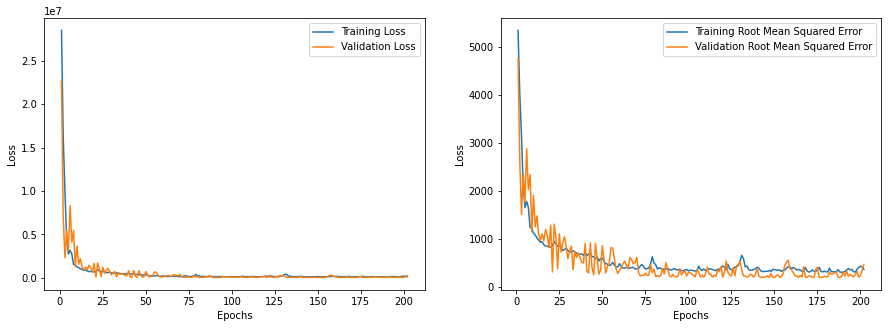

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of MARUTI

In [32]:
MARUTI_prediction = MARUTI_Model.predict(MARUTI_Test_X)

In [33]:
MARUTI_prediction

array([[6911.7896, 6913.987 , 6932.385 , 6931.5146, 6867.987 ],
       [6886.831 , 6889.0996, 6907.3296, 6906.635 , 6843.272 ],
       [6852.82  , 6855.1255, 6873.2036, 6872.618 , 6809.529 ],
       [6839.0273, 6841.4165, 6859.345 , 6858.9517, 6795.9194],
       [6879.318 , 6881.6436, 6899.777 , 6899.2134, 6835.871 ],
       [6905.228 , 6907.375 , 6925.8154, 6924.844 , 6861.4155],
       [6959.1743, 6961.312 , 6979.93  , 6978.8945, 6914.9917],
       [7012.7866, 7014.6895, 7033.771 , 7032.188 , 6967.991 ],
       [7439.1562, 7441.951 , 7461.2153, 7461.2046, 7392.4795],
       [7585.523 , 7588.036 , 7608.108 , 7607.373 , 7537.5635],
       [7642.296 , 7644.3394, 7665.182 , 7663.389 , 7593.4487],
       [7650.6455, 7652.663 , 7673.563 , 7671.7104, 7601.716 ],
       [7625.184 , 7627.3853, 7647.9746, 7646.5347, 7576.6235],
       [7707.9717, 7709.9536, 7731.0767, 7729.0986, 7658.621 ],
       [7699.4595, 7701.324 , 7722.569 , 7720.346 , 7650.039 ]],
      dtype=float32)

In [34]:
MARUTI[MARUTI['Date'] >= '2021-08-01']['stock_adjclose_target'].values

array([7032.114746, 7153.788574, 7057.899902, 7027.549805, 7100.799805,
       7081.75    , 7001.950195, 7021.5     , 7012.      , 7002.200195,
       6826.850098, 6885.399902, 6840.100098, 6850.899902, 6825.899902,
       6803.200195, 6711.450195, 6608.600098, 6624.850098, 6796.899902,
       6846.100098, 6784.899902, 6792.899902, 6863.100098, 6846.899902,
       6877.149902, 6781.25    , 6802.25    , 6873.700195, 6894.450195,
       6909.      , 6930.950195, 7014.450195, 6950.399902, 6777.      ,
       6831.      , 6846.700195, 6952.25    , 7403.450195, 7423.850098,
       7384.049805, 7338.049805, 7162.299805, 7170.299805, 7258.25    ,
       7199.25    , 7492.5     , 7430.      , 7700.799805, 7693.799805,
       7482.149902, 7496.899902, 7657.      , 7655.649902, 7590.75    ,
       7575.25    , 7408.899902, 7260.600098, 7297.350098, 7356.25    ,
       7369.700195, 7482.399902, 7615.549805, 7791.75    , 7734.25    ,
       7747.399902, 7684.600098, 7577.549805, 7511.649902, 7453.

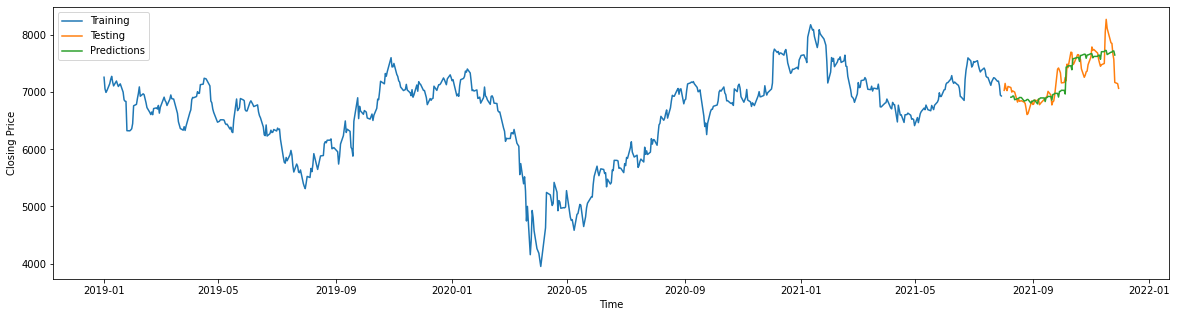

In [35]:
plt.figure(figsize=(20, 5))
plt.plot(MARUTI['Date'][MARUTI['Date'] < '2021-08-01'], MARUTI['stock_adjclose_target'][MARUTI['Date'] < '2021-08-01'], label = 'Training')
plt.plot(MARUTI['Date'][MARUTI['Date'] >= '2021-08-01'], MARUTI['stock_adjclose_target'][MARUTI['Date'] >= '2021-08-01'], label = 'Testing')
plt.plot(MARUTI['Date'][MARUTI['Date'] >= '2021-08-01'].values[5:-2], MARUTI_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [36]:
rmse = math.sqrt(mean_squared_error(MARUTI_Test_Y.reshape(-1, 5), MARUTI_prediction))
mape = np.mean(np.abs(MARUTI_prediction - MARUTI_Test_Y.reshape(-1, 5))/np.abs(MARUTI_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 191.2372679700481
MAPE: 0.01962839082747802
